In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection Methods

The [sklearn.feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) module implements various feature selection algorithms. 

It currently includes univariate filter selection methods and the recursive feature elimination algorithm

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

## Prepare the data - Titanic Dataset

In [2]:
# load the dataset, using PassengerId as index
df_train = pd.read_csv("../../datasets/Titanic/train.csv", index_col='PassengerId')
df_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Data variable descriptions:
<pre>
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
</pre>

### Deal with NaN values

In [3]:
df_train.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

We have NaN values, which we fill with some proper values, after getting some insight.

In [4]:
# check what are the unique values in Cabin:
print(df_train.Cabin.unique())

# check what are the unique values in Age:
print(df_train.Age.unique())
print(df_train.Age.median())

# check what are the unique values in Embarked:
print(df_train.Embarked.unique())
print(df_train.Embarked.value_counts()) 

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
[22.   38.   26.   35.     nan 54.    2.   

In [5]:
# Put 'S' for 'Embarked' null values, as this value is most frequent:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

# put the median passengers age for 'Age' null values
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

# put some new value (like 'C0') for  all 'Cabin' null values
# check if the new value exists
# print('C0' in df_train.Cabin)

df_train["Cabin"] = df_train["Cabin"].fillna('C0')


### Replace non-numerical values to numbers

In [6]:
# helper function
def multiple_categories_to_numbers(s):
     # Get the unique values 
    unique_values = s.unique()

    # Generate a mapping of strings values to a numbers (0,1,...)    
    values_map = dict(zip(unique_values, range(0, len(unique_values) + 1)))    

    # Transform from a string to an integer number representation
    return s.map(values_map).astype(int)

In [7]:
df_train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,C0,S


In [8]:
for column in df_train:
    if df_train[column].dtype == "object":        
        df_train[column] = multiple_categories_to_numbers(df_train[column])

# check the data
df_train.dtypes


Survived      int64
Pclass        int64
Name          int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object

## Feature Selection

In [ ]:
# Separate X and y from dataset
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [167]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Removing features with low variance

sklearn.feature_selection - removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

This method is not useful for our data, as we have some categorical features ('Sex', 'Pclass', 'Embarked'). Of course, we may exclude these columns, 

In [166]:
from sklearn.feature_selection import VarianceThreshold

# show the variances for each column - that may help when choosing the treshold:
# print(X.var().sort_values())

# select treshold
treshold = 0.8
sel = VarianceThreshold(threshold=treshold).fit(X)

# create a boolean mask of features retained:
mask = sel.get_support()    

# show the retained columns names
retained_columns = X.columns[mask]    
print(retained_columns)


# if we are ok, we have to apply the transformation
# sel.transform(X)


Index(['Name', 'Age', 'SibSp', 'Ticket', 'Fare', 'Cabin'], dtype='object')


### Remove high correlated features 

Features with high correlation are more linearly dependent and will have almost the same effect on the dependent variable. So, we can use only one of those features.

In [144]:
# get correlation matrix
cm = X.corr().abs()
cm.round(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,1.00,0.04,0.13,0.34,0.08,0.02,0.02,0.55,0.62,0.05
Name,0.04,1.00,0.04,0.03,0.06,0.00,0.76,0.01,0.24,0.03
Sex,0.13,0.04,1.00,0.08,0.11,0.25,0.13,0.18,0.08,0.12
Age,0.34,0.03,0.08,1.00,0.23,0.17,0.12,0.10,0.22,0.01
SibSp,0.08,0.06,0.11,0.23,1.00,0.41,0.30,0.16,0.06,0.06
Parch,0.02,0.00,0.25,0.17,0.41,1.00,0.27,0.22,0.00,0.08
Ticket,0.02,0.76,0.13,0.12,0.30,0.27,1.00,0.14,0.21,0.02
Fare,0.55,0.01,0.18,0.10,0.16,0.22,0.14,1.00,0.40,0.06
Cabin,0.62,0.24,0.08,0.22,0.06,0.00,0.21,0.40,1.00,0.02
Embarked,0.05,0.03,0.12,0.01,0.06,0.08,0.02,0.06,0.02,1.00


In [146]:
# # plot the correlation matrix with Seaborn heatmap:
# plt.figure(figsize=(15,7))
# sns.heatmap(cm.round(2),annot=True, cmap="Reds")

Remove features with correlation high correlation (treshold > 0.9)

In [159]:
treshold = 0.03
cm_rows = cm.shape[0]
columns_retained_mask = np.full(cm_rows, True)

# loop over the elements which are above main diagonal:
for i in range(cm_rows):
    for j in range(i+1,cm_rows):        
        if cm.iloc[i,j] >= treshold:
            columns_retained_mask[j] = False        

# remove the features with 'False' in mask
# X = X.loc[:,columns_retained_mask]

### Method 2: Univariate Selection

Uses statistical scoring function to select those features that have the strongest relationship with the output variable.

Scikit-learn exposes several feature selection routines as objects, like:

[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest): removes all but the  highest scoring features

[SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile): removes all but a user-specified highest scoring percentage of features


The scoring functions used are:

- **For regression**: f_regression, mutual_info_regression
- **For classification**: chi2, f_classif, mutual_info_classif





Sex         372.405724
Pclass      115.031272
Cabin        70.180708
Fare         63.030764
Embarked     10.259355
Parch         5.963464
Age           3.761528
Ticket        1.993210
SibSp         1.110572
Name          0.022285
dtype: float64


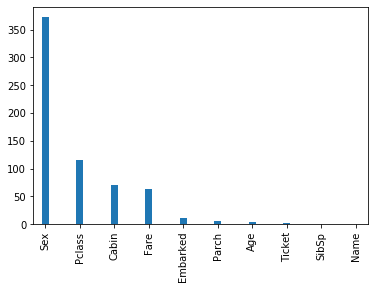

In [160]:
from sklearn.feature_selection import SelectKBest, f_classif

# select 5 most significant features:
sel = SelectKBest(f_classif, k=1).fit(X,y)

# compute the importance of each feature, sorted:
scores = sel.scores_
# print( sorted(zip(X.columns, scores), key=lambda t:t[1], reverse=True) )

feat_importances = pd.Series(scores, index=X.columns).sort_values(ascending=False)
print(feat_importances)

#plot graph of feature importances
feat_importances.plot(kind='bar', width=0.2)
plt.show()


### Method 3: Feature Importance


Sex         0.275325
Age         0.137946
Ticket      0.111767
Fare        0.109002
Name        0.106705
Pclass      0.100325
Cabin       0.051933
SibSp       0.039049
Parch       0.035615
Embarked    0.032333
dtype: float64


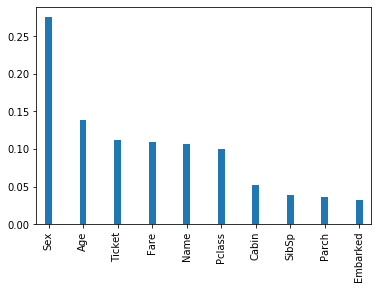

In [161]:
from sklearn.ensemble import ExtraTreesClassifier

sel = ExtraTreesClassifier()
sel.fit(X,y)

# compute the importance of each feature, sorted:
feat_importances = pd.Series(sel.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importances)

#plot graph of feature importances
feat_importances.plot(kind='bar', width=0.2)
plt.show()


## Build and test the model

### Split train and test data

In [163]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)